In [1]:
import pandas as pd
from bokeh.plotting import figure, show
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.palettes import Blues3,Blues9
from IPython.display import clear_output
import numpy as np
from bokeh.models import FactorRange
import ipywidgets as widgets
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap
output_notebook()

Loading BokehJS ...

In [2]:
df_contributors = pd.read_csv('C:\\csv-data-collect\\github-2023_06_31_contributors.csv')
df_contributors_top_20 = pd.read_csv('C:\\csv-data-collect\\github-2023_06_31_contributors_top_20_stars.csv')
df_repos = pd.read_csv('C:\\csv-data-collect\\github-2023_06_31_main.csv')

# <p style='color:red;font-size:20px;text-align:center'>Users compare to organisations.</p>

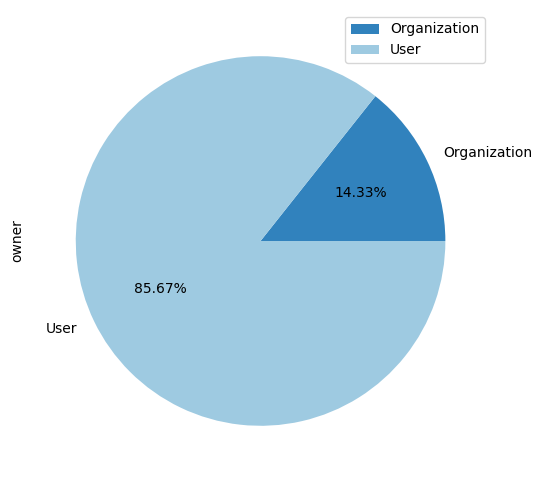

In [3]:
d = df_repos.groupby(by=['owner'])['owner'].count()

dd = pd.DataFrame(d,index=['Organization','User'])

dd.plot.pie(y='owner',autopct="%.2f%%", colors=Blues3,figsize=(6, 6))

plt.show()

# <p style='color:red;font-size:20px;text-align:center'>license and unlicensed project.</p>

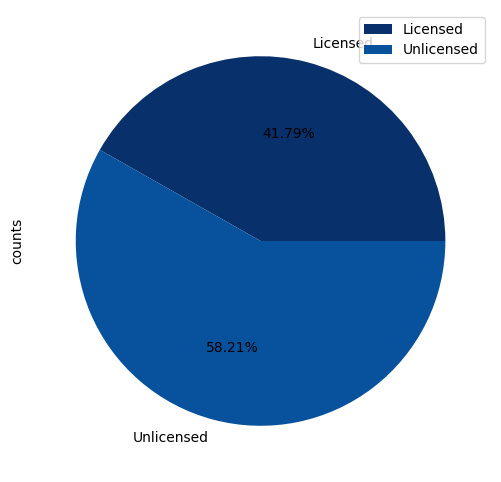

In [4]:
licensed = len(df_repos.loc[df_repos['license'] != 'Not included'])
unlicensed = len(df_repos.loc[df_repos['license'] == 'Not included'])

dict_of_licensed_and_unlicensed = dict(licensed=licensed,unlicensed=unlicensed)

data = pd.DataFrame.from_dict(dict_of_licensed_and_unlicensed.items()).rename(index={0:'Licensed',1:'Unlicensed'},columns={0:'license',1:'counts'})

data.plot.pie(y='counts',autopct="%.2f%%", colors=Blues9,figsize=(6, 6))

plt.show()

# <p style='color:red;font-size:20px;text-align:center'>top 3 repos with number of commit for each contributors </p>

In [5]:
repo_name = df_repos.nlargest(3,columns=['stargazers_count'])['full_name']
repos_filtred = []
for x in repo_name:
    df = df_contributors_top_20.loc[df_contributors_top_20['full_name'] == x]
    for index,d in df.iterrows():
        repos_filtred.append(dict(full_name = x,commit = d.commit,contributor = d.contributor))

df_filtred = pd.DataFrame(repos_filtred)
df_grouped = df_filtred.groupby(['full_name','contributor'])['commit'].apply(lambda x:x).reset_index()

In [6]:
factors = tuple(df_grouped[['full_name','contributor']].itertuples(index=False,name=None))

p = figure(x_range=FactorRange(*factors), height=400,
           toolbar_location='right', width = 900,tools="pan,wheel_zoom,box_zoom,reset,save")

x = df_grouped['commit'].to_list()
p.vbar(x=factors, top=x, width=0.9, alpha=0.5,legend_label='Number of commit for contributor base on project')


p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

In [7]:
len(df_repos['language'].unique().tolist())

182

# <p style='color:red;font-size:20px;text-align:center'>The Most Used Technology.</p>

In [8]:
def GetTheMostUsedLanguge(Rows_number):
    data = df_repos['language'].value_counts().head(Rows_number).to_dict()
    group_data = list(data.values())
    group_languagea_names = list(data.keys())
    languages = group_languagea_names
    counts = group_data

    source = ColumnDataSource(data=dict(languages=languages, counts=counts))

    p = figure(x_range=languages, height=350, toolbar_location="right", title="Technology Counts",width=900)
    p.vbar(x='languages', top='counts', width=0.9, source=source, legend_field="languages",
        line_color='white', fill_color=factor_cmap('languages', palette=Spectral6, factors=languages))

    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.y_range.end = group_data[0] + 400
    p.legend.orientation = "horizontal"
    p.legend.location = "top_center"
    show(p)

GetTheMostUsedLanguge(5)

# <p style='color:red;font-size:20px;text-align:center'>The Most Widely Used Technology By The Time.</p>

In [9]:
df_by_date = df_repos.groupby('created_at')[['language','full_name']].apply(lambda x:x)

In [10]:
data = df_by_date.groupby(['created_at','language'])['full_name'].count().reset_index(name='counts')

In [11]:
def GetNumberOfReposPerEachDay(date):
    clear_output(wait=True)
    display(wd)
    data_for_each_day = data.loc[data['created_at'] == date][['created_at','language','counts']]
    factors =  tuple(data_for_each_day[['created_at','language']].itertuples(index=False,name=None))

    p = figure(x_range=FactorRange(*factors), height=400,
            toolbar_location='right', width = 900,tools="pan,wheel_zoom,box_zoom,reset,save")

    x = data_for_each_day['counts'].to_list()
    p.vbar(x=factors, top=x, width=0.9, alpha=0.5,legend_label='Number of repos')

    p.y_range.start = 0
    p.x_range.range_padding = 0.1
    p.xaxis.major_label_orientation = 1
    p.xgrid.grid_line_color = None

    show(p)


wd = widgets.Dropdown(
    options=data['created_at'].unique().tolist(),
    value=data['created_at'].unique().tolist()[0],
    description='Temps :',
    disabled=False,
)

wd.observe(lambda x:GetNumberOfReposPerEachDay(x['new']),names='value')

display(wd)

Dropdown(description='Temps :', index=12, options=('2023-06-01', '2023-06-02', '2023-06-03', '2023-06-04', '20…